#### Курсовой проект для курса "Python для Data Science"

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
     Функция для расчета коэффициента детерминации - R2 для тренировочных и валидных данных.

    Parameters:
    -----------
    train_true_values: pandas.Series
        Вектор целевой переменной для тренировочных данных.

    train_pred_values: pandas.Series
        Прогнозный вектор целевой переменной для тренировочных данных.

    test_true_values: pandas.Series
        Вектор целевой переменной для валидных данных.

    test_pred_values: pandas.Series
        Прогнозный вектор целевой переменной для валидных данных.

    Returns:
    --------
    R2 - коэффициент детерминации.
        .
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Пути к директориям и файлам**

In [5]:
TRAIN_DATASET = 'train.csv'
TEST_DATASET = 'test.csv'

**Описание датасета:**
* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

**Обработка тренировочных данных**

In [6]:
train_df = pd.read_csv(TRAIN_DATASET)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [7]:
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [8]:
train_df.shape

(10000, 20)

In [9]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['Id'].dtype

dtype('O')

#### Приведение типов данных

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [11]:
train_df.dtypes

Id                object
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Обзор количественных переменных

In [12]:
train_df_num_features = train_df.select_dtypes(include=['float64','int64'])
train_df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [13]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Обзор номинативных переменных

In [14]:
train_df_obj_features = train_df.select_dtypes(include='object').columns.tolist()
train_df_obj_features

['Id', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [15]:
for obj_feature in train_df_obj_features[2:]:
    print(str(obj_feature) + '\n\n' + str(train_df[obj_feature].value_counts()) + '\n' + '*' * 30 + '\n')

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
******************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
******************************



#### Обработка пропусков

In [16]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### Находим два признака с пропусками  LifeSquare и Healthcare_1, заменим пропуски по ним на медианные значения.

#### LifeSquare

In [17]:
train_df.loc[train_df['LifeSquare'].isnull(),'LifeSquare'] = train_df['LifeSquare'].median()

#### Healthcare_1

In [18]:
train_df.loc[train_df['Healthcare_1'].isnull(),'Healthcare_1'] = train_df['Healthcare_1'].median()

#### Обработка выбросов

In [19]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570



#### При максимальной общей площади квартиры  Square в 641, максимальные значение LifeSquare и KitchenSquare сильно больше, что кажется странным, так как жилая площадь и площадь кухни не могут быть больше площади самой квартиры. 


**LifeSquare**

In [20]:
train_df[train_df['LifeSquare'] >= 641]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366


#### Находим этот выброс, при общей площади в 81, жилая площадь составляет 7480. Считаем это выбросом, и заменим его на медианное значение.

In [21]:
train_df.loc[train_df['LifeSquare'] >= 641, 'LifeSquare'] = train_df['LifeSquare'].median()

In [22]:
train_df[train_df['LifeSquare'] < 10].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,900.0,1,11,B,286564.441972
134,12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,174687.566186
160,3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815


**LifeSquare < 10 считаем выбросами, поэтому заменим их на медианное значение**

In [23]:
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = train_df['LifeSquare'].median()

**KitchenSquare**

In [24]:
train_df[train_df['KitchenSquare'] >= 641]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,900.0,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


#### Находим два выброса, при общей площади в 47 и 32, площадь кухни  составляет 2014 и 1970. Считаем это выбросами, и заменим их на медианное значение.

In [25]:
train_df.loc[train_df['KitchenSquare'] >= 641, 'KitchenSquare'] = train_df['KitchenSquare'].median()

**Rooms**

In [26]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [27]:
filter = train_df["Rooms"].isin([0, 6, 10,19])
train_df[filter].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,900.0,5,15,B,317265.323792
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,900.0,0,1,B,78364.616704
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


**Количество комнат 0,6,10,19 при указанной Square кажутся выбросами, поэтому заменим их на медианное значение**

In [28]:
train_df.loc[train_df["Rooms"].isin([0, 6, 10,19]), 'Rooms'] = train_df['Rooms'].median()

**Square**

In [29]:
train_df[train_df['Square'] < 10].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,32.781260,1.0,18,1.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,32.781260,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,32.781260,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061


**Square < 10 считаем выбросами, поэтому заменим их на медианное значение**

In [30]:
train_df.loc[train_df['Square'] < 10, 'Square'] = train_df['Square'].median()

**HouseYear**

In [31]:
train_df[train_df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


**Значения HouseYear равные 20052011 и 4968 считаем выбросами и заменяем на текущий год** 

In [32]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

**HouseFloor**

**Заменяем значения равные 0 на медианные**

In [33]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [34]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.888400,56.374350,36.121799,5.876100,8.526700,12.95910,1984.872400,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.811056,20.979981,17.460973,5.174014,5.241148,6.44346,18.416347,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,1.000000,13.784865,10.523868,0.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.794392,27.654813,1.000000,4.000000,9.00000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513580,32.781260,6.000000,7.000000,13.00000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.423128,9.000000,12.000000,17.00000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,5.000000,641.065193,638.163193,123.000000,42.000000,117.00000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Отбор и построение новых признаков для тренировочного датасета

#### исключаем признак "id"

In [35]:
train_df = train_df.drop(['Id'], axis=1)

In [36]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


**Преобразуем категориальные признаки**

In [37]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0,'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0,'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0,'B':1})
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,7976,5,900.0,0,11,B,184966.930730,1,1,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,10309,1,240.0,1,16,B,300009.450063,1,1,1
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,7759,0,229.0,1,3,B,220925.908524,1,1,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,5735,3,1084.0,0,5,B,175616.227217,1,1,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,5776,1,2078.0,2,4,B,150226.531644,1,1,1


**DistrictSize**, **IsDistrictLarge**

In [38]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
.rename(columns={'index':'DistrictId','DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


**Создаем новый признак DistrictSize - размер района по количеству квартир.**

In [39]:
train_df = train_df.merge(district_size,on='DistrictId', how='left')
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,5,900.0,0,11,B,184966.930730,1,1,1,22
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,1,240.0,1,16,B,300009.450063,1,1,1,87
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,0,229.0,1,3,B,220925.908524,1,1,1,174
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,3,1084.0,0,5,B,175616.227217,1,1,1,179
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,1,2078.0,2,4,B,150226.531644,1,1,1,97


In [40]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [41]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,900.0,0,11,B,184966.930730,1,1,1,22,0
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,240.0,1,16,B,300009.450063,1,1,1,87,0
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,229.0,1,3,B,220925.908524,1,1,1,174,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,1084.0,0,5,B,175616.227217,1,1,1,179,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,2078.0,2,4,B,150226.531644,1,1,1,97,0


**Записываем новый признак IsDistrictLarge: большой ли район, 0 - нет, 1 - да**

**LifeSquareShare**

In [42]:
train_df['LifeSquareShare'] = train_df['LifeSquare'] / train_df['Square']

**Добавляем новый признак - LifeSquareShare - доля жилой площади**

**FloorShare**

In [43]:
train_df['FloorShare'] = train_df['Floor'] / train_df['HouseFloor']

**Добавляем новый признак - FloorShare - доля этажности квартиры**

In [44]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,11,B,184966.930730,1,1,1,22,0,0.613626,0.777778
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,16,B,300009.450063,1,1,1,87,0,0.609734,0.777778
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,3,B,220925.908524,1,1,1,174,1,0.649587,0.666667
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,5,B,175616.227217,1,1,1,179,1,0.988352,0.470588
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,4,B,150226.531644,1,1,1,97,0,0.599663,0.916667


In [45]:
train_df.shape

(10000, 26)

**Обработка тестовых данных**

In [46]:
test_df = pd.read_csv(TEST_DATASET)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [47]:
test_df.shape

(5000, 19)

In [48]:
result = pd.DataFrame(test_df['Id'])
test_df['Id'] = test_df['Id'].astype(str)
test_df['Id'].dtype

dtype('O')

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

#### Обработка пропусков

In [50]:
test_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

**Находим два признака с пропусками  LifeSquare и Healthcare_1, заменим пропуски по ним на медианные значения**

In [51]:
test_df.loc[test_df['LifeSquare'].isnull(),'LifeSquare'] = test_df['LifeSquare'].median()

In [52]:
test_df.loc[test_df['Healthcare_1'].isnull(),'Healthcare_1'] = test_df['Healthcare_1'].median()

**Обработка выбросов**

In [53]:
test_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


**Square**

In [54]:
test_df[test_df['Square'] < 10].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B


**Square < 10 считаем выбросами, поэтому заменим их на медианное значение**

In [55]:
test_df.loc[test_df['Square'] < 10, 'Square'] = test_df['Square'].median()

**LifeSquare**

In [56]:
test_df[test_df['LifeSquare'] < 10].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
18,3495,27,3.0,82.652818,5.690155,1.0,4,17.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A
66,9011,53,1.0,52.921340,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
71,9205,120,2.0,85.911827,4.188395,1.0,5,1.0,2016,0.341072,B,B,27,5664,48,2300.0,3,11,B
77,7034,45,2.0,59.927502,3.798341,1.0,23,1.0,2017,0.195781,B,B,23,5212,6,900.0,3,2,B
78,6553,34,5.0,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B


**LifeSquare < 10 считаем выбросами, поэтому заменим их на медианное значение**

In [57]:
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = test_df['LifeSquare'].median()

**Rooms**

In [58]:
filter = test_df["Rooms"].isin([0, 17])
test_df[filter]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


**Количество комнат 0,17 при указанной Square кажутся выбросами, поэтому заменим их на медианное значение**

In [59]:
test_df.loc[test_df["Rooms"].isin([0,17]), 'Rooms'] = test_df['Rooms'].median()

**Floor**

In [60]:
test_df[test_df["Floor"] > 70]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4698,15759,17,2.0,57.60187,37.744743,10.0,78,22.0,1989,0.0,B,B,25,5027,4,46.0,1,1,B


**Этаж квартиры равный 78 кажется выбросом, при этажности дома в 22,  заменим его на медианное значение**

In [61]:
test_df.loc[test_df['Floor'] > 70, 'Floor'] = test_df['Floor'].median()

**HouseFloor**

In [62]:
test_df[test_df["HouseFloor"] == 0].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,12694,27,3.0,83.670032,46.358356,0.0,8.0,0.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A
24,8968,27,2.0,69.849239,32.925087,0.0,3.0,0.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B
30,2982,6,2.0,63.460684,32.925087,0.0,13.0,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
32,2449,1,1.0,66.426585,32.925087,0.0,14.0,0.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
46,12309,45,1.0,42.899569,32.925087,0.0,25.0,0.0,1977,0.195781,B,B,23,5212,6,900.0,3,2,B


In [63]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

**Заменяем значения HouseFloor равные 0 на медианные**

**Отбор и построение новых признаков для тестового датасета**

**исключаем признак "id"** 

In [64]:
test_df = test_df.drop(['Id'], axis=1)

**Преобразуем категориальные признаки**

In [65]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0,'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0,'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0,'B':1})
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,B,...,11,2748,1,900.0,0,0,B,1,1,1
1,74,2.0,69.263183,32.925087,1.0,6.0,1.0,1977,0.075779,B,...,6,1437,3,900.0,0,2,B,1,1,1
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,B,...,30,7538,87,4702.0,5,5,B,1,1,1
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,B,...,23,4583,3,900.0,3,3,B,1,1,1
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,B,...,2,629,1,900.0,0,0,A,1,1,0


**DistrictSize**, **IsDistrictLarge - создаем новые признаки: размер района и признак большого района**

In [66]:
district_size = test_df['DistrictId'].value_counts().reset_index()\
.rename(columns={'index':'DistrictId','DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [67]:
test_df = test_df.merge(district_size,on='DistrictId', how='left')
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,B,...,2748,1,900.0,0,0,B,1,1,1,91
1,74,2.0,69.263183,32.925087,1.0,6.0,1.0,1977,0.075779,B,...,1437,3,900.0,0,2,B,1,1,1,61
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,B,...,7538,87,4702.0,5,5,B,1,1,1,2
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,B,...,4583,3,900.0,3,3,B,1,1,1,49
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,B,...,629,1,900.0,0,0,A,1,1,0,391


In [68]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,B,...,1,900.0,0,0,B,1,1,1,91,0
1,74,2.0,69.263183,32.925087,1.0,6.0,1.0,1977,0.075779,B,...,3,900.0,0,2,B,1,1,1,61,0
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,B,...,87,4702.0,5,5,B,1,1,1,2,0
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,B,...,3,900.0,3,3,B,1,1,1,49,0
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,B,...,1,900.0,0,0,A,1,1,0,391,1


**LifeSquareShare - новый признак, доля жилой площади**

In [69]:
test_df['LifeSquareShare'] = test_df['LifeSquare'] / test_df['Square']

**FloorShare - новый признак, доля этажности квартиры**

In [70]:
test_df['FloorShare'] = test_df['Floor'] / test_df['HouseFloor']

In [71]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,B,...,0,0,B,1,1,1,91,0,0.670229,0.428571
1,74,2.0,69.263183,32.925087,1.0,6.0,1.0,1977,0.075779,B,...,0,2,B,1,1,1,61,0,0.475362,6.000000
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,B,...,5,5,B,1,1,1,2,0,1.172853,0.400000
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,B,...,3,3,B,1,1,1,49,0,0.711064,1.000000
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,B,...,0,0,A,1,1,0,391,1,0.912901,1.000000


In [72]:
test_df.shape

(5000, 25)

### Визуализация и анализ данных

In [73]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,11,B,184966.930730,1,1,1,22,0,0.613626,0.777778
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,16,B,300009.450063,1,1,1,87,0,0.609734,0.777778
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,3,B,220925.908524,1,1,1,174,1,0.649587,0.666667
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,5,B,175616.227217,1,1,1,179,1,0.988352,0.470588
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,4,B,150226.531644,1,1,1,97,0,0.599663,0.916667


### Анализ целевой переменной

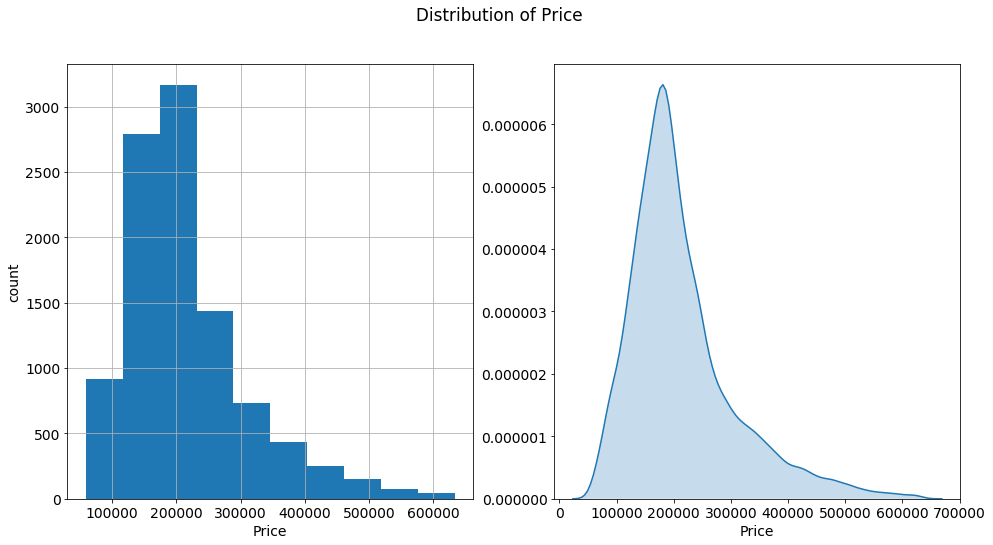

In [74]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

**Видим, что целевая переменная Price распределена нормально, без каких-либо сильных отклонений**

In [75]:
target_mean = round(train_df['Price'].mean(), 2)
target_median = round(train_df['Price'].median(), 2)
target_mode = round(train_df['Price'].mode()[0], 2)
target_mean, target_median, target_mode

(214138.86, 192269.64, 59174.78)

**Среднее значение, медиана и мода - также вполне нормальные**

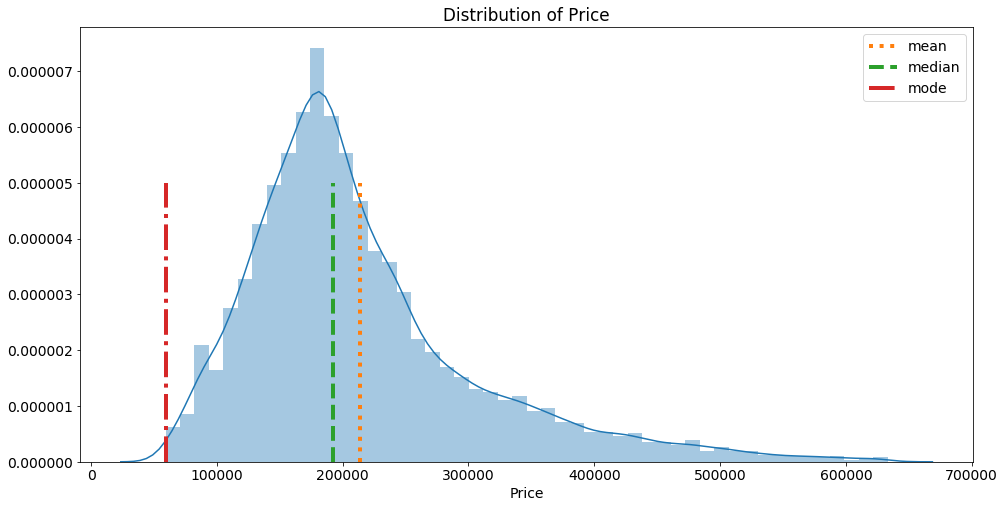

In [76]:
plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### Оценка распредения целевой переменной в разрезе других признаков

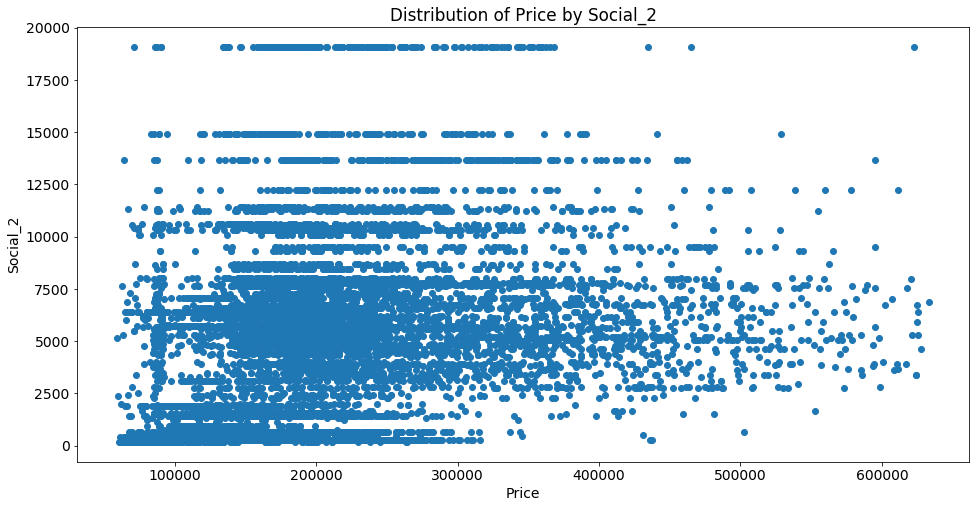

In [77]:
plt.figure(figsize=(16, 8))

plt.scatter(train_df['Price'], train_df['Social_2'])

plt.xlabel('Price')
plt.ylabel('Social_2')
plt.title('Distribution of Price by Social_2')
plt.show()

**Распределение цены относительно признака Social_2 равномерное, при значении Social_2 от 0 до 1**

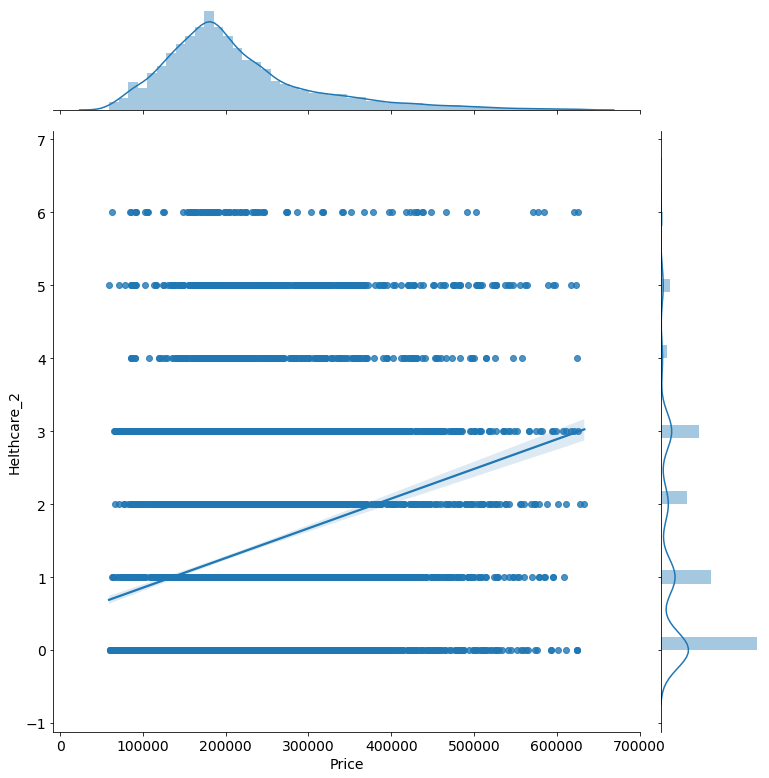

In [78]:
grid = sns.jointplot(train_df['Price'], train_df['Helthcare_2'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Более равномерное распределение по цене квартир при значении признака Helthcare_2 от 0 до 3**

### Анализ признаков

**Количественные признаки**

In [79]:
df_num_features = train_df.select_dtypes(include=['float64','int64'])

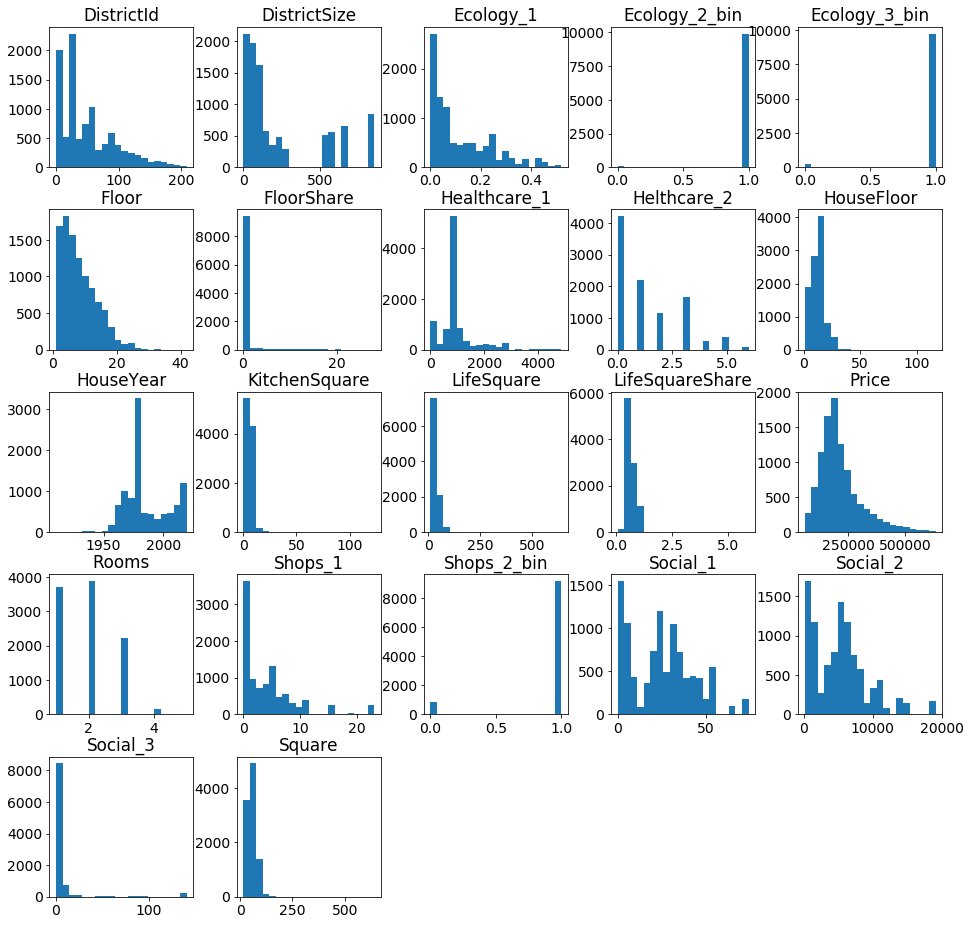

In [80]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

#### Матрица корреляций

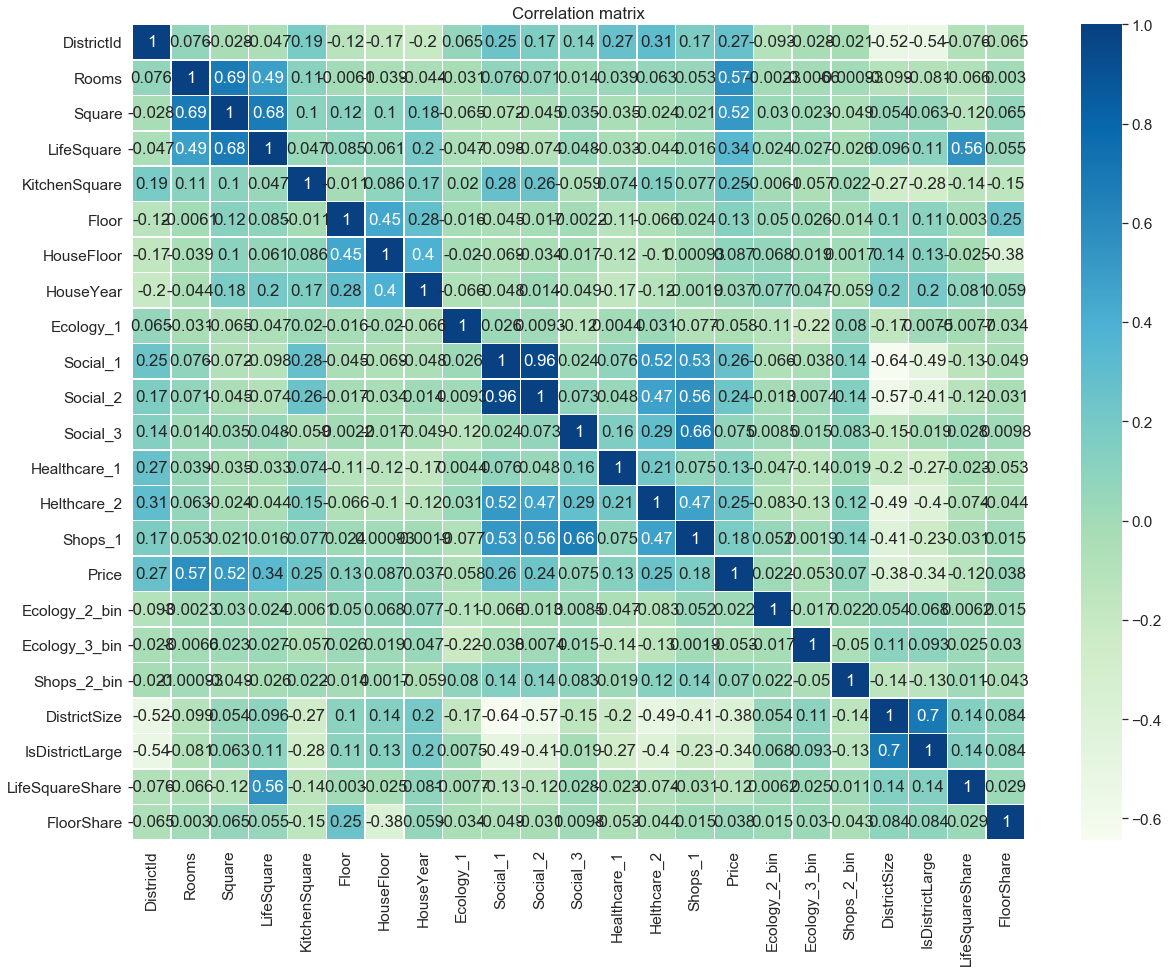

In [81]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

**На матрице корреляций видно, что наша целевая переменная зависит в первую очередь 
от количества комнат в квартире, площади и жилой площади,а также от таких признаков как DistrictId,Social_1,Helthcare_2.**

**Отбор признаков обучающего датасета**

In [82]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,11,B,184966.930730,1,1,1,22,0,0.613626,0.777778
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,16,B,300009.450063,1,1,1,87,0,0.609734,0.777778
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,3,B,220925.908524,1,1,1,174,1,0.649587,0.666667
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,5,B,175616.227217,1,1,1,179,1,0.988352,0.470588
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,4,B,150226.531644,1,1,1,97,0,0.599663,0.916667


In [83]:
train_df.dtypes

DistrictId           int64
Rooms              float64
Square             float64
LifeSquare         float64
KitchenSquare      float64
Floor                int64
HouseFloor         float64
HouseYear            int64
Ecology_1          float64
Ecology_2           object
Ecology_3           object
Social_1             int64
Social_2             int64
Social_3             int64
Healthcare_1       float64
Helthcare_2          int64
Shops_1              int64
Shops_2             object
Price              float64
Ecology_2_bin        int64
Ecology_3_bin        int64
Shops_2_bin          int64
DistrictSize         int64
IsDistrictLarge      int32
LifeSquareShare    float64
FloorShare         float64
dtype: object

In [84]:
train_df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'LifeSquareShare',
 'FloorShare']

In [85]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 
                 'Floor', 'HouseFloor','HouseYear', 'Ecology_1', 'Social_1','Social_2',
                 'Social_3','Healthcare_1','Helthcare_2','Shops_1','Ecology_2_bin','Ecology_3_bin',
                 'Shops_2_bin','DistrictSize','IsDistrictLarge','LifeSquareShare','FloorShare']

target_name = 'Price'

In [86]:
train_df = train_df[feature_names + [target_name]]
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,...,0,11,1,1,1,22,0,0.613626,0.777778,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,...,1,16,1,1,1,87,0,0.609734,0.777778,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,...,1,3,1,1,1,174,1,0.649587,0.666667,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,...,0,5,1,1,1,179,1,0.988352,0.470588,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,...,2,4,1,1,1,97,0,0.599663,0.916667,150226.531644


**Стандартизация признаков обучающего датасета**

In [87]:
feature_names_for_stand = train_df[feature_names].select_dtypes(include=['float64','int64']).columns.tolist()
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'LifeSquareShare',
 'FloorShare']

In [88]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(train_df[feature_names_for_stand])

In [89]:
train_df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [90]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare,Price
0,-0.353348,0.137605,-0.400058,-0.382532,0.023948,-0.291306,-0.614468,-0.861908,-0.250529,0.474169,...,-0.883480,1.408356,0.09897,0.16816,0.299864,-0.819047,0,-0.187830,-0.137644,184966.930730
1,-0.215687,1.370628,0.443745,0.224955,0.410514,-0.291306,-0.614468,-0.373187,-0.998053,1.215681,...,-0.213923,2.448700,0.09897,0.16816,0.299864,-0.577393,0,-0.208626,-0.137644,300009.450063
2,0.059635,0.137605,-0.544661,-0.396572,-1.135751,-0.100498,-0.148856,-0.916210,-0.581588,0.531208,...,-0.213923,-0.256195,0.09897,0.16816,0.299864,-0.253948,1,0.004287,-0.185103,220925.908524
3,0.174352,0.137605,-0.144019,0.951295,0.603797,-0.100498,0.627163,-0.427489,2.680470,-0.096225,...,-0.883480,0.159943,0.09897,0.16816,0.299864,-0.235359,1,1.814110,-0.268856,175616.227217
4,1.115034,-1.095417,-0.797236,-0.707077,0.217231,0.471924,-0.148856,-0.481792,-0.894969,0.588247,...,0.455633,-0.048126,0.09897,0.16816,0.299864,-0.540215,0,-0.262426,-0.078319,150226.531644


In [91]:
train_df.mean()

DistrictId         2.241762e-16
Rooms             -1.626033e-16
Square             3.838152e-16
LifeSquare         2.031708e-18
KitchenSquare     -7.118750e-17
Floor             -1.426914e-16
HouseFloor         4.697354e-17
HouseYear          1.402323e-15
Ecology_1          5.593304e-17
Social_1          -9.445500e-17
Social_2           5.659084e-17
Social_3          -8.172851e-16
Healthcare_1       3.604450e-16
Helthcare_2       -1.040990e-15
Shops_1           -1.531331e-16
Ecology_2_bin      1.130926e-15
Ecology_3_bin     -2.029599e-16
Shops_2_bin        5.780376e-16
DistrictSize       1.180944e-16
IsDistrictLarge    5.069000e-01
LifeSquareShare   -2.011946e-16
FloorShare        -1.051936e-17
Price              2.141389e+05
dtype: float64

In [92]:
train_df.std()

DistrictId             1.000050
Rooms                  1.000050
Square                 1.000050
LifeSquare             1.000050
KitchenSquare          1.000050
Floor                  1.000050
HouseFloor             1.000050
HouseYear              1.000050
Ecology_1              1.000050
Social_1               1.000050
Social_2               1.000050
Social_3               1.000050
Healthcare_1           1.000050
Helthcare_2            1.000050
Shops_1                1.000050
Ecology_2_bin          1.000050
Ecology_3_bin          1.000050
Shops_2_bin            1.000050
DistrictSize           1.000050
IsDistrictLarge        0.499977
LifeSquareShare        1.000050
FloorShare             1.000050
Price              92872.293865
dtype: float64

**Отбор признаков тестового датасета**

In [93]:
feature_names_test = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 
                 'Floor', 'HouseFloor','HouseYear', 'Ecology_1', 'Social_1','Social_2',
                 'Social_3','Healthcare_1','Helthcare_2','Shops_1','Ecology_2_bin','Ecology_3_bin',
                 'Shops_2_bin','DistrictSize','IsDistrictLarge','LifeSquareShare','FloorShare']


**Стандартизация признаков тестового датасета**

In [94]:
feature_names_for_stand_test = test_df[feature_names_test].select_dtypes(include=['float64','int64']).columns.tolist()
feature_names_for_stand_test

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'LifeSquareShare',
 'FloorShare']

In [95]:
scaler = StandardScaler()
stand_features_test = scaler.fit_transform(test_df[feature_names_for_stand_test])

In [96]:
test_df[feature_names_for_stand_test] = pd.DataFrame(stand_features_test, columns=feature_names_for_stand_test)
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,LifeSquareShare,FloorShare
0,0.152140,0.113827,-0.350299,-0.178043,0.002332,-0.485296,0.167688,-0.667299,1.585280,B,...,-0.891612,-0.888194,B,0.098453,0.175258,0.299666,-0.192646,0,0.115697,-0.286221
1,0.514336,0.113827,0.671195,-0.211499,-0.500230,-0.485296,-1.842216,-0.398066,-0.367283,B,...,-0.891612,-0.469511,B,0.098453,0.175258,0.299666,-0.428182,0,-0.932064,2.193550
2,3.140252,-1.120741,-2.262773,-1.330219,0.605406,-1.226829,-1.223784,-4.059632,-0.998468,B,...,2.487242,0.158513,B,0.098453,0.175258,0.299666,-0.891403,0,2.818212,-0.298938
3,-0.096869,0.113827,0.870609,1.041580,0.303869,2.480836,1.404552,1.217331,-0.149940,B,...,1.135700,-0.260169,B,0.098453,0.175258,0.299666,-0.522397,0,0.335262,-0.031886
4,-0.549613,-1.120741,-0.474453,0.477946,-0.500230,1.553919,0.631512,1.755796,-0.397445,B,...,-0.891612,-0.888194,A,0.098453,0.175258,-3.337053,2.162712,1,1.420501,-0.031886


In [97]:
test_df.shape

(5000, 25)

**Разбиение на train, valid и test**

In [98]:
X = train_df[feature_names]
y = train_df[target_name]

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [100]:
X_test = test_df[feature_names_test]

**Построение модели¶**

**Gradient Boosting**

In [101]:
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train R2:	0.991
Test R2:	0.73


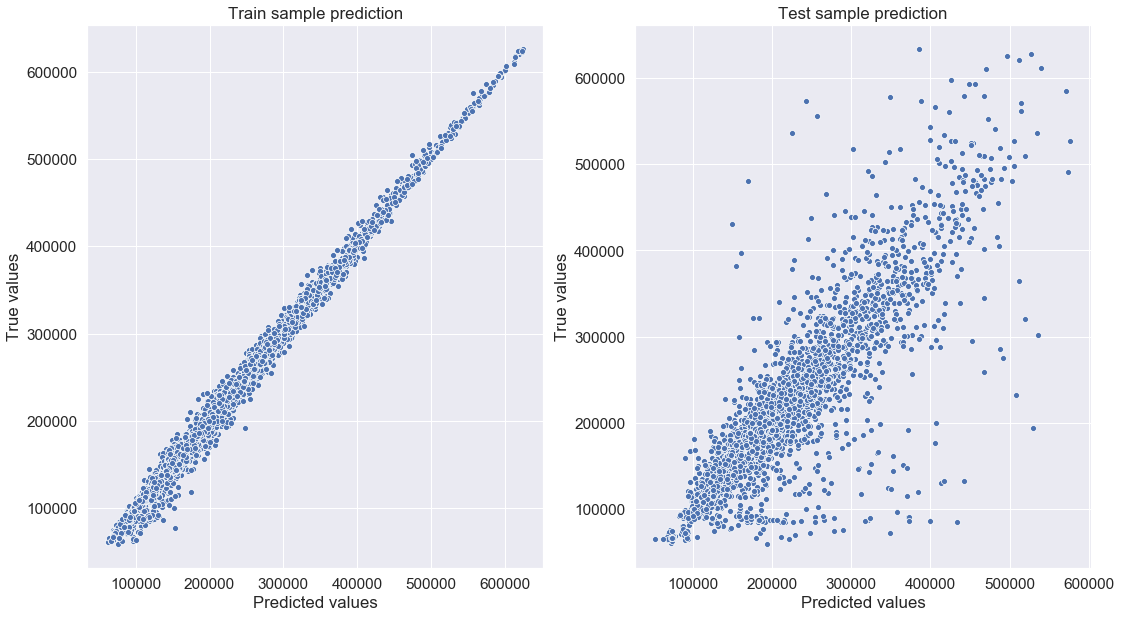

In [102]:
y_train_preds = final_model.predict(X_train)
y_valid_preds = final_model.predict(X_valid)
evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

**Модель Gradient Boosting показала наилучший R2 = 0.73 для валидных данных, поэтому используем её.**

In [103]:
y_train_preds = final_model.predict(X)
y_test_preds = final_model.predict(X_test)
result.insert(1,'Price', final_model.predict(X_test))
result.to_csv('Zhigaryova_predictions.csv', index=False)

**Важность признаков**

In [104]:
feature_importances = pd.DataFrame(zip(X.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False).head()

,feature_name,importance
2,Square,0.433545
18,DistrictSize,0.221111
11,Social_3,0.044370
8,Ecology_1,0.034175
7,HouseYear,0.033047


**Важными признаками оказались такие как площадь, размер района, social_2, ecology_1 и год постройки дома**

**Перекрестная проверка**

In [105]:
cv_score = cross_val_score(final_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.75488849, 0.69623138, 0.73981423, 0.74887898, 0.74109016])

In [106]:
cv_score.mean(),cv_score.std()

(0.7361806472806254, 0.020709808669993057)

In [107]:
cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.7154708386106323, 0.7568904559506184)

**В соответствии с кроссвалидацией получаем среднее - 0.73 и стандартное отклонение - 0.02, что свидетельствует о том, что данные не очень шумные.**